<a href="https://colab.research.google.com/github/shiny1912/tensorflow/blob/master/1%EC%A3%BC%EC%B0%A8_%EC%95%94%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4981 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3749 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3357 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3136 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2953 - acc: 0.8903
10000/10000 - 0s - loss: 0.3339 - acc: 0.8815
\테스트: 정확도 0.8815


AttributeError: ignored

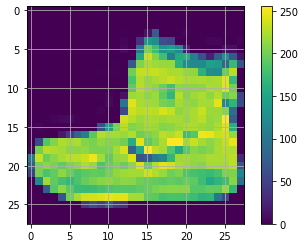

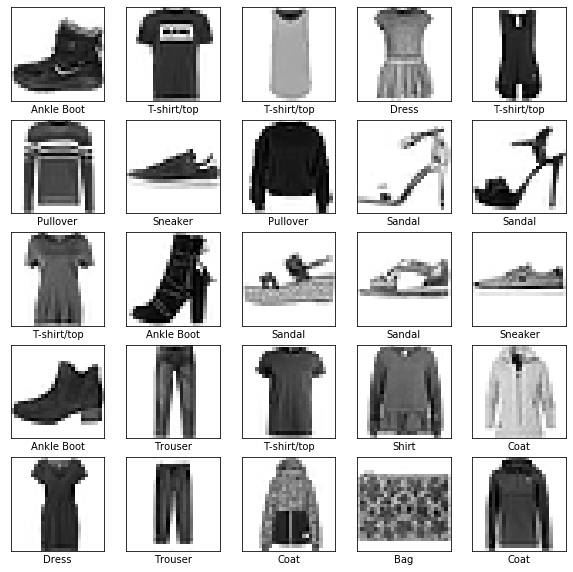

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
#plt.show()

train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
#plt.show()

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\테스트: 정확도', test_acc)

predictions = model.predict(test_images)
predictions[0]
np.argamax(predictions[0])
test_labels[0]




In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version : ",tf.__version__)
print("Eager mode :" ,tf.executing_eagerly())
print("Hub version : " , hub.__version__)
print("GPU is," "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE" )

train_data, validation_data, test_data = tfds.load(
    name = 'imdb_reviews',
    split = ('train[:60%]', 'train[:60%]', 'test'),
    as_supervised = True
)
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape = [],
                           dtype = tf.string, trainable = True)
model = tf.Keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.summary()

model.compile(optimizer = 'adam', 
              loss = 'binary-crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs = 20,
                    validation_data = validation_data.batch(512),
                    verbose = 1)
for name,value in zip(model.metrics_names,results):
  print("%s: %.3f" % (name, value))




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-8143f6baa1f1>", line 2, in <module>
    import tensorflow as tf
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 656, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 626, in _load_backward_compatible
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_import_hooks/_tensorflow.py", line 34, in load_module
    tf_module = imp.load_module(fullname, *self.module_info)
  File "/usr/lib/python3.6/imp.py", line 245, in load_module
    return load_package(name, filename)
  File "/usr/lib/python3.6/imp.py", line 217, in load_package
    return _load(spec)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__ini

KeyboardInterrupt: ignored

In [3]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

dataset_path= keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()
dataset.isna().sum()
dataset = dataset.dropna()
dataset['Origin'] = datase['Origin'].map(lambda x: {1:'USA', 2:'Europe', 3:'Japan'}.get(x))

dataset=pd.get_dummies(dataset, prefix ='', prefix_sep='' )
dataset.tail()

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind = "kde")

train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
       layers.Dense(64, activation='relu', input_shape = [len(train_dataset.keys())]),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)

      
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', 
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

  model=build_model()
  model.summary()
  EPOCHS = 1000
  history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split=0.2, verbose=0,
      callbacks=[tfdocs.modeling.EpochDots()]
  )

  model=build_model()
  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10)
  early_history = model.fit(normed_train_data, train_labels, 
                            epochs=EPOCHS, validation_split=0.2, verbose=0,
                            callbacks=[early_stop, tfdocs.modeling.EpochDots()])

AttributeError: ignored

In [0]:
!pip install -q sklearn
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORIAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categoriacl_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds=ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

ds=make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
  print('Some feature keys:', list(feature_batch.keys()))
  print(  )
  print('A batch of class:', feature_batch['class'].numpy())
  print()
  print('A batch of Labels:', label_batch.numpy())

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
